<a href="https://colab.research.google.com/github/thiagolermen/ml-course/blob/main/src/1-simple-linear-regression/SimpleLinearRegression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Linear Regression

We're going to implement simple linear regression to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You'd like to figure out what the expected profit of a new food truck might be given only the population of the city that it would be placed in.

## Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset

In [2]:
path = 'https://raw.githubusercontent.com/thiagolermen/ml-course/main/data/ex1data1.txt?token=AL353PDSLXNW3BY6B6E6HX3AXPKMW'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


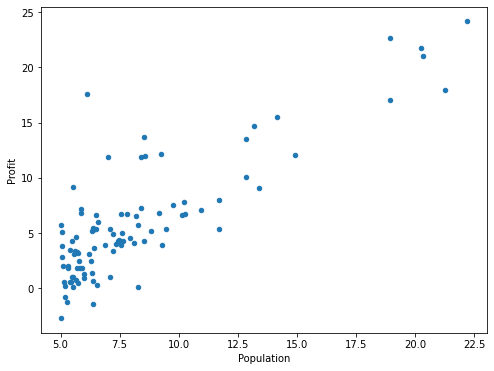

In [3]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(8,6))

In [4]:
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [5]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [6]:
print(f" X.shape: {X.shape} \n y.shape: {y.shape} \n theta.shape {theta.shape}")

 X.shape: (97, 2) 
 y.shape: (97, 1) 
 theta.shape (1, 2)


## Cost function

Hypothesis

$h_{\theta}(x) = \theta_0 + \theta_1 x$

Cost

$J(\theta_0, \theta_1) = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left ( \hat{y}_{i}- y_{i} \right)^2 = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left (h_\theta (x_{i}) - y_{i} \right)^2$

In [7]:
def loss(X, y, theta):
    squared_error = np.power(((X * theta.T) - y), 2)
    return np.sum(squared_error) / (2 * len(X))

In [8]:
loss(X,y,theta)

32.072733877455676

## Gradient descent

$\theta_0 := \theta_0 - \alpha \dfrac {1}{m} \displaystyle \sum _{i=1}^m \left (h_\theta (x^{(i)}) - y^{(i)} \right)$

$\theta_1 := \theta_1 - \alpha \dfrac {1}{m} \displaystyle \sum _{i=1}^m \left (h_\theta (x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}$

In [9]:
temp = np.matrix(np.zeros(theta.shape))
print(temp, temp.shape)
parameters = int(theta.ravel().shape[1])
print(parameters)
error = (X * theta.T) - y
print(error.shape)
term = np.multiply(error, X[:,0])

[[0. 0.]] (1, 2)
2
(97, 1)


In [10]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    n_parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(n_parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = loss(X, y, theta)
        
    return theta, cost

## Train

In [11]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters
new_theta, cost = gradientDescent(X, y, theta, alpha, iters)
print(f" New theta: {new_theta} \n Final cost: {loss(X, y, new_theta)}")

 New theta: [[-3.24140214  1.1272942 ]] 
 Final cost: 4.515955503078912


## Test

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

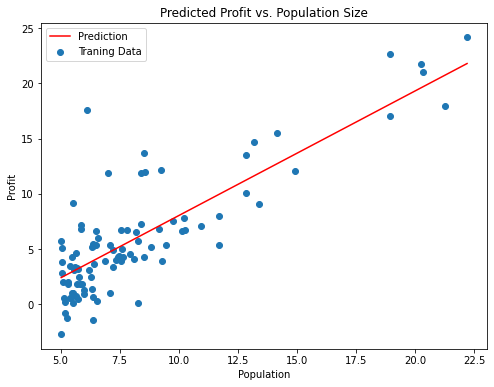

In [12]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = new_theta[0, 0] + (new_theta[0, 1] * x)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

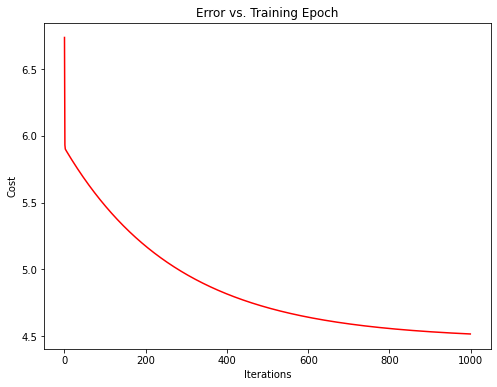

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')